In [1]:
import Preprocess as util
import numpy as np
import matplotlib.pyplot as plt
import keras
import keras.backend as K
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential, Input
from keras.layers import Dropout, Flatten, Dense

/home/arko/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load and Train and Test Split

In [2]:
input_data, labels = util.load_data()
print('Input Data Shape = {}'.format(input_data.shape))
print('Labels Shape = {}'.format(labels.shape))

train_x, test_x, train_y, test_y = train_test_split(input_data, labels, test_size = 0.20, random_state = 42)
print('Training input data shape = {}'.format(train_x.shape))
print('Training labels shape = {}'.format(train_y.shape))
print('Testing input data shape = {}'.format(test_x.shape))
print('Testing labels shape = {}'.format(test_y.shape))

Input Data Shape = (41188, 19)
Labels Shape = (41188, 1)
Training input data shape = (32950, 19)
Training labels shape = (32950, 1)
Testing input data shape = (8238, 19)
Testing labels shape = (8238, 1)


# Architecture of Neural Network

In [10]:
input_tensor = Input(shape = (input_data.shape[1],))

def model(input_value):
    x = Dense(units = 200, activation = 'tanh')(input_value)
    x = Dense(units = 100, activation = 'relu')(x)
    x = Dense(units = 50, activation = 'tanh')(x)
    x = Dense(units = 30, activation = 'relu')(x)
    x = Dense(units = 10, activation = 'tanh')(x)
    output = Dense(units = 1, activation = 'sigmoid')(x)
    model = Model(inputs = input_value, outputs = output, name = 'model')
    model.summary()
    return model 

def compile_and_train(model, num_epochs):
    model.compile(optimizer= 'adam', loss= 'mse', metrics = ['acc']) 
    history = model.fit(train_x, train_y, batch_size=32, epochs = num_epochs)
    return history

# Training Model on Train Dataset

In [11]:
epochs = 200
model = model(input_tensor)
history = compile_and_train(model, epochs)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 19)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 200)               4000      
_________________________________________________________________
dense_20 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_21 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_22 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total para

32950/32950 [==============================] - 4s 133us/step - loss: 0.0660 - acc: 0.9059
Epoch 69/200
32950/32950 [==============================] - 4s 128us/step - loss: 0.0656 - acc: 0.9062
Epoch 70/200
32950/32950 [==============================] - 4s 122us/step - loss: 0.0661 - acc: 0.9065
Epoch 71/200
32950/32950 [==============================] - 4s 126us/step - loss: 0.0667 - acc: 0.9061
Epoch 72/200
32950/32950 [==============================] - 4s 127us/step - loss: 0.0656 - acc: 0.9053
Epoch 73/200
32950/32950 [==============================] - 4s 124us/step - loss: 0.0651 - acc: 0.9064
Epoch 74/200
32950/32950 [==============================] - 4s 122us/step - loss: 0.0660 - acc: 0.9068
Epoch 75/200
32950/32950 [==============================] - 4s 121us/step - loss: 0.0663 - acc: 0.9066
Epoch 76/200
32950/32950 [==============================] - 4s 124us/step - loss: 0.0661 - acc: 0.9076
Epoch 77/200
32950/32950 [==============================] - 4s 126us/step - loss: 0.06

32950/32950 [==============================] - 4s 132us/step - loss: 0.0643 - acc: 0.9066
Epoch 148/200
32950/32950 [==============================] - 4s 134us/step - loss: 0.0640 - acc: 0.9079
Epoch 149/200
32950/32950 [==============================] - 4s 133us/step - loss: 0.0636 - acc: 0.9079
Epoch 150/200
32950/32950 [==============================] - 4s 132us/step - loss: 0.0641 - acc: 0.9072
Epoch 151/200
32950/32950 [==============================] - 4s 131us/step - loss: 0.0646 - acc: 0.9065
Epoch 152/200
32950/32950 [==============================] - 4s 128us/step - loss: 0.0637 - acc: 0.9082
Epoch 153/200
32950/32950 [==============================] - 4s 135us/step - loss: 0.0640 - acc: 0.9073
Epoch 154/200
32950/32950 [==============================] - 5s 138us/step - loss: 0.0653 - acc: 0.9059
Epoch 155/200
32950/32950 [==============================] - 5s 145us/step - loss: 0.0635 - acc: 0.9091
Epoch 156/200
32950/32950 [==============================] - 5s 145us/step - l

# Plot the Graphs 

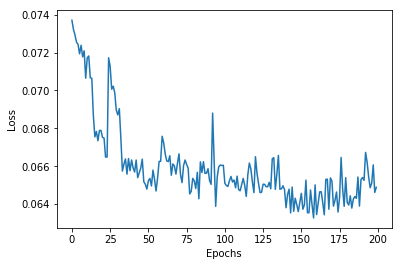

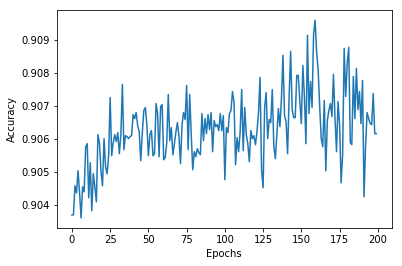

In [16]:
epoch_list = [i for i in range(epochs)]
loss_list = history.history['loss']
acc_list = history.history['acc']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epoch_list,loss_list, label = 'Loss')
plt.show()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epoch_list,acc_list, label = 'Accuracy')
plt.show()

# Testing the Data

In [17]:
loss,acc = model.evaluate(test_x,test_y)
print('Test Loss = {}'.format(loss))
print('Test Accuracy = {}'.format(acc))

8238/8238 [==============================] - 1s 65us/step
Test Loss = 0.06141745105917577
Test Accuracy = 0.9100509832049493
